# Titanic Competition- Kaggle

## By Saeed Dehghani

In [1]:
import numpy as np
import pandas as pd
pd.options.display.float_format = "{:.3f}".format
pd.set_option("max_columns",None)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing dataset
data = pd.read_csv("train_titanic.csv")
submission = pd.read_csv("test_titanic.csv")

**I wil use CRISP-DM methodology that naturally describes the data science life cycle.**

# Part1: Data Inspection

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [4]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.000,0,0,211536,13.000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000,0,0,112053,30.000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000,0,0,111369,30.000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.000,0,0,370376,7.750,NaN,Q


In [5]:
data.shape

(891, 12)

In [6]:
data.isna().any().any()

True

In [7]:
# this dataset contains exactly the same variables, but not the target(Survived)
submission.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.500,0,0,330911,7.829,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000,1,0,363272,7.000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.000,0,0,240276,9.688,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.000,0,0,315154,8.662,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000,1,1,3101298,12.287,NaN,S


In [8]:
submission.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.050,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000,0,0,PC 17758,108.900,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.500,0,0,SOTON/O.Q. 3101262,7.250,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.050,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.358,NaN,C


In [9]:
submission.shape

(418, 11)

In [10]:
submission.isna().any().any()

True

**Variables Discription**

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [13]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000,891.000,891.000,714.000,891.000,891.000,891.000
mean,446.000,0.384,2.309,29.699,0.523,0.382,32.204
std,257.354,0.487,0.836,14.526,1.103,0.806,49.693
min,1.000,0.000,1.000,0.420,0.000,0.000,0.000
25%,223.500,0.000,2.000,20.125,0.000,0.000,7.910
50%,446.000,0.000,3.000,28.000,0.000,0.000,14.454
75%,668.500,1.000,3.000,38.000,1.000,0.000,31.000
max,891.000,1.000,3.000,80.000,8.000,6.000,512.329


- there are missing value in both dataset


- we have categorical and numerical variables

## Part2: Data preparation

### check all variables (numerical & categorical)

#### Categorical

In [14]:
categorical = [var for var in data.columns if data[var].dtype=="O"]

In [15]:
data[categorical].head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


In [16]:
# check Number of categories(labels) in categorical variables
data[categorical].apply(lambda x: len(x.unique()))

Name        891
Sex           2
Ticket      681
Cabin       148
Embarked      4
dtype: int64

- we have 2 mixed variables. **Cabin and Ticket**


- Name,Ticket and Cabin contain a lot of labels.they need to some manual preprocessing.


- better to extract the numerical part and then the non-numerical part and generate 2 variables out of them.

#### Numerical 

In [17]:
numerical = [var for var in data.columns if data[var].dtype!="O"]

In [18]:
data[numerical].head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.000,1,0,7.250
1,2,1,1,38.000,1,0,71.283
2,3,1,3,26.000,0,0,7.925
3,4,1,1,35.000,1,0,53.100
4,5,0,3,35.000,0,0,8.050


In [19]:
data[numerical].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000,891.000,891.000,714.000,891.000,891.000,891.000
mean,446.000,0.384,2.309,29.699,0.523,0.382,32.204
std,257.354,0.487,0.836,14.526,1.103,0.806,49.693
min,1.000,0.000,1.000,0.420,0.000,0.000,0.000
25%,223.500,0.000,2.000,20.125,0.000,0.000,7.910
50%,446.000,0.000,3.000,28.000,0.000,0.000,14.454
75%,668.500,1.000,3.000,38.000,1.000,0.000,31.000
max,891.000,1.000,3.000,80.000,8.000,6.000,512.329


#### Discrete 

In [20]:
discrete = [var for var in numerical if len(data[var].unique()) < 10 and var not in ["Survived"]]

for var in discrete:
    print(var,"values",data[var].unique())

Pclass values [3 1 2]
SibSp values [1 0 3 4 2 5 8]
Parch values [0 1 2 5 3 4 6]


In [21]:
for var in discrete:
    print(data[var].value_counts() / data.shape[0])
    print()

3   0.551
1   0.242
2   0.207
Name: Pclass, dtype: float64

0   0.682
1   0.235
2   0.031
4   0.020
3   0.018
8   0.008
5   0.006
Name: SibSp, dtype: float64

0   0.761
1   0.132
2   0.090
3   0.006
5   0.006
4   0.004
6   0.001
Name: Parch, dtype: float64



**Pclass**: all numbers present in this variable are at least 20% of the passengers.

**SibSp**  Values bigger than 4 are rare. replace with most frequency

**Parch**  values bigger than 2 are rare. replace with most frequency

#### Continuous

In [22]:
continuous = [var for var in numerical if var not in discrete and var not in ["PassengerId", "Survived"]]

In [23]:
data[continuous].head()

,Age,Fare
0,22.000,7.250
1,38.000,71.283
2,26.000,7.925
3,35.000,53.100
4,35.000,8.050


#### Target

In [24]:
data["Survived"].value_counts(normalize=True) * 100

0   61.616
1   38.384
Name: Survived, dtype: float64

Summary:

- 5 categorical variables: from them 2 could be treated as mixed type of variables (numbers and strings)


- 7 numerical variables: 3 discrete, 2 continious, 1 Id, and 1 binary target


- quite equal class distribution for Target


- Metric for Evaluation is Accuracy

### Missing values

In [25]:
# percentage of missing values for each variable(train datset)
for var in data.columns:
    if data[var].isnull().sum()>0:
        print(var, round(data[var].isna().sum() / data[var].shape[0],3))

Age 0.199
Cabin 0.771
Embarked 0.002


In [26]:
# percentage of missing values for each variable(test dataset)
for var in submission.columns:
    if submission[var].isna().sum()>0:
        print(var, round(submission[var].isna().sum() / submission[var].shape[0],3))

Age 0.206
Fare 0.002
Cabin 0.782


### check distributions & outliers(univariate analysis)

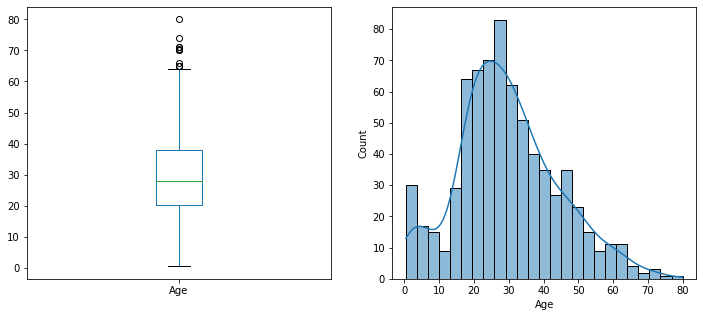

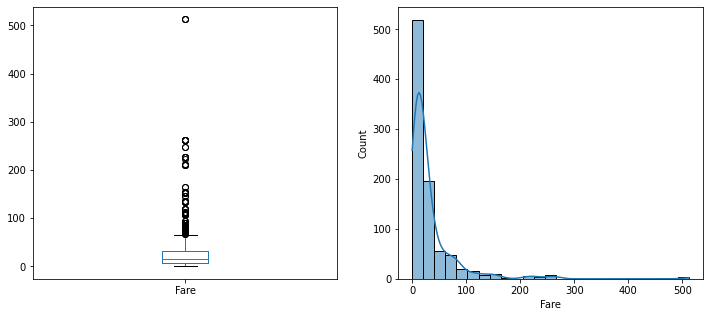

In [27]:
# check outliers and distributions among continous variables with boxplot and histogram (univariate analysis)

for var in continuous:
    plt.figure(figsize=(12,5))
    plt.subplot(1, 2, 1)
    data.boxplot(column=var,grid=False)
    
    plt.subplot(1, 2, 2)
    sns.histplot(data = data[var], kde = True,bins=25)

    plt.show()

- Age is quite Normal and Fare is right skewed.


- both of them contains outlier(at top)


- Capping outliers for Age(observations whose values are above upperboundary will be set to upperband)


- for more about capping,got to https://papers.ssrn.com/sol3/papers.cfm?abstract_id=1431352 and https://www.statisticshowto.com/winsorize/


-  discretisation for Fare(we convert continuous variable to discrete)

In [28]:
# check outliers for Capping in Age
Upper_boundary = data["Age"].mean() + 3 * data["Age"].std()
Lower_boundary = data["Age"].mean() - 3 * data["Age"].std()

print("Age outliers are values < {lowerboundary} or > {upperboundary}".format(lowerboundary=Lower_boundary, upperboundary=Upper_boundary))

Age outliers are values < -13.88037434994331 or > 73.27860964406095


In [29]:
data.loc[data["Age"] > 73] 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.000,0,0,27042,30.000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.000,0,0,347060,7.775,NaN,S


##### From now on, the maximum age will be 73.

### check correlation between continuous variables (bivariate analysis)

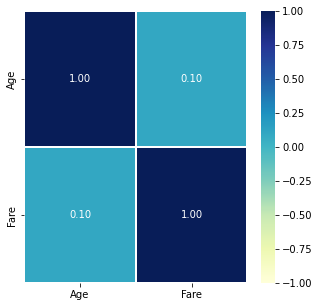

In [30]:
plt.figure(figsize=(5,5))
sns.heatmap(data[continuous].corr(),cmap="YlGnBu",annot=True,fmt=".2f",linewidths=1.5,vmin=-1,vmax=1)
plt.show()

### Pre-processing of mixed type of variables

In [31]:
data[categorical].head(20)

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
5,"Moran, Mr. James",male,330877,NaN,Q
6,"McCarthy, Mr. Timothy J",male,17463,E46,S
7,"Palsson, Master. Gosta Leonard",male,349909,NaN,S
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,347742,NaN,S
9,"Nasser, Mrs. Nicholas (Adele Achem)",female,237736,NaN,C


#### Cabin(for train data)

In [32]:
data["Cabin_numerical"] = data["Cabin"].str.extract("(\d+)") # extracts number from string
data["Cabin_numerical"] = data["Cabin_numerical"].astype("float") # change types of  above variable to float

data["Cabin_categorical"] = data["Cabin"].str[0] # captures first letter of string (the letter of the cabin)

In [33]:
categorical.append("Cabin_categorical")
categorical.remove("Cabin")
continuous.append("Cabin_numerical")

#### Cabin(for test data)

In [34]:
submission["Cabin_numerical"] = submission["Cabin"].str.extract("(\d+)")
submission["Cabin_numerical"] = submission["Cabin_numerical"].astype("float")

submission["Cabin_categorical"] = submission["Cabin"].str[0]

In [35]:
data[["Cabin", "Cabin_numerical","Cabin_categorical"]].head(10)

,Cabin,Cabin_numerical,Cabin_categorical
0,NaN,NaN,NaN
1,C85,85.000,C
2,NaN,NaN,NaN
3,C123,123.000,C
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,E46,46.000,E
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN


In [36]:
submission[["Cabin", "Cabin_numerical","Cabin_categorical"]].head(10)

,Cabin,Cabin_numerical,Cabin_categorical
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN


In [37]:
# drop the original variable
data.drop(labels="Cabin", inplace=True, axis=1)
submission.drop(labels="Cabin", inplace=True, axis=1)

#### Ticket(for train data)

In [38]:
data["Ticket_numerical"] = data["Ticket"].apply(lambda s: s.split()[-1]) # extract the last bit of ticket as number
data["Ticket"].apply(lambda s: s.split()[-1]).str.isdigit().sum() # Some observations do not include the ticket number 

887

In [39]:
data["Ticket_numerical"] = np.where(data["Ticket_numerical"].str.isdigit(), data["Ticket_numerical"], np.nan)
data["Ticket_numerical"] = data["Ticket_numerical"].astype("float")

In [40]:
data["Ticket_categorical"]= data["Ticket"].apply(lambda s: s.split()[0]) # extract the first part of ticket as category
data["Ticket_categorical"].str.isdigit().sum() # Some observations do not include the ticket category

661

In [41]:
data["Ticket_categorical"] = np.where(data["Ticket_categorical"].str.isdigit(), np.nan, data["Ticket_categorical"])

#### Ticket(for test data)

In [42]:
submission["Ticket_numerical"] = submission["Ticket"].apply(lambda s: s.split()[-1]) 
submission["Ticket_numerical"] = np.where(submission["Ticket_numerical"].str.isdigit(), submission["Ticket_numerical"], np.nan)
submission["Ticket_numerical"] = submission["Ticket_numerical"].astype("float")

submission["Ticket_categorical"] = submission["Ticket"].apply(lambda s: s.split()[0]) 
submission["Ticket_categorical"] = np.where(submission["Ticket_categorical"].str.isdigit(), np.nan, submission["Ticket_categorical"])

In [43]:
data[["Ticket","Ticket_numerical","Ticket_categorical"]].head(10)

,Ticket,Ticket_numerical,Ticket_categorical
0,A/5 21171,21171.000,A/5
1,PC 17599,17599.000,PC
2,STON/O2. 3101282,3101282.000,STON/O2.
3,113803,113803.000,NaN
4,373450,373450.000,NaN
5,330877,330877.000,NaN
6,17463,17463.000,NaN
7,349909,349909.000,NaN
8,347742,347742.000,NaN
9,237736,237736.000,NaN


In [44]:
submission[["Ticket","Ticket_numerical","Ticket_categorical"]].head(10)

,Ticket,Ticket_numerical,Ticket_categorical
0,330911,330911.000,NaN
1,363272,363272.000,NaN
2,240276,240276.000,NaN
3,315154,315154.000,NaN
4,3101298,3101298.000,NaN
5,7538,7538.000,NaN
6,330972,330972.000,NaN
7,248738,248738.000,NaN
8,2657,2657.000,NaN
9,A/4 48871,48871.000,A/4


In [45]:
# drop the original variable
data.drop(labels="Ticket", inplace=True, axis=1)
submission.drop(labels="Ticket", inplace=True, axis=1)

#### transform Ticket_categorical(for train data)

In [46]:
data["Ticket_categorical"].unique()

array(['A/5', 'PC', 'STON/O2.', nan, 'PP', 'A/5.', 'C.A.', 'A./5.',
       'SC/Paris', 'S.C./A.4.', 'A/4.', 'CA', 'S.P.', 'S.O.C.', 'SO/C',
       'W./C.', 'SOTON/OQ', 'W.E.P.', 'STON/O', 'A4.', 'C', 'SOTON/O.Q.',
       'SC/PARIS', 'S.O.P.', 'A.5.', 'Fa', 'CA.', 'LINE', 'F.C.C.', 'W/C',
       'SW/PP', 'SCO/W', 'P/PP', 'SC', 'SC/AH', 'A/S', 'A/4', 'WE/P',
       'S.W./PP', 'S.O./P.P.', 'F.C.', 'SOTON/O2', 'S.C./PARIS',
       'C.A./SOTON'], dtype=object)

In [47]:
# remove non letter characters from string
# for text / string processing
import re

non_letter = data["Ticket_categorical"].apply(lambda x: re.sub("[^a-zA-Z]", "", str(x)))
non_letter

0          A
1         PC
2      STONO
3        nan
4        nan
       ...  
886      nan
887      nan
888       WC
889      nan
890      nan
Name: Ticket_categorical, Length: 891, dtype: object

In [48]:
# compare two variables
pd.concat([non_letter, data["Ticket_categorical"]], axis=1).head(10)

,Ticket_categorical,Ticket_categorical
0,A,A/5
1,PC,PC
2,STONO,STON/O2.
3,nan,NaN
4,nan,NaN
5,nan,NaN
6,nan,NaN
7,nan,NaN
8,nan,NaN
9,nan,NaN


In [49]:
non_letter = non_letter.str.upper()
non_letter.unique()

array(['A', 'PC', 'STONO', 'NAN', 'PP', 'CA', 'SCPARIS', 'SCA', 'SP',
       'SOC', 'WC', 'SOTONOQ', 'WEP', 'C', 'SOP', 'FA', 'LINE', 'FCC',
       'SWPP', 'SCOW', 'PPP', 'SC', 'SCAH', 'AS', 'SOPP', 'FC', 'SOTONO',
       'CASOTON'], dtype=object)

In [50]:
# change ticket categorical to reduced new variable
data["Ticket_categorical"] = non_letter

In [51]:
categorical.remove("Ticket")
categorical.append("Ticket_categorical")
continuous.append("Ticket_numerical")

#### transform Ticket_categorical(for test data)

In [52]:
submission["Ticket_categorical"] = submission["Ticket_categorical"].apply(lambda x: re.sub("[^a-zA-Z]", '', str(x)))
submission["Ticket_categorical"] = submission["Ticket_categorical"].str.upper()

#### Extract title for Name variable(train data)

In [53]:
# extracts the title from the name variable
def get_title(passenger):
    line = passenger
    if re.search("Mrs", line):
        return "Mrs"
    elif re.search("Mr", line):
        return "Mr"
    elif re.search("Miss", line):
        return "Miss"
    elif re.search("Master", line):
        return "Master"
    else:
        return "Other"

In [54]:
data["Name"].apply(get_title)

0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
       ...  
886    Other
887     Miss
888     Miss
889       Mr
890       Mr
Name: Name, Length: 891, dtype: object

In [55]:
data["Title"] = data["Name"].apply(get_title)

In [56]:
data[["Name", "Title"]].head(10)

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr
5,"Moran, Mr. James",Mr
6,"McCarthy, Mr. Timothy J",Mr
7,"Palsson, Master. Gosta Leonard",Master
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Mrs
9,"Nasser, Mrs. Nicholas (Adele Achem)",Mrs


In [57]:
categorical.remove("Name")
categorical.append("Title")

#### Extract title for Name variable(test data)

In [58]:
submission["Title"] = submission["Name"].apply(get_title)

In [59]:
# drop the original variable
data.drop(labels="Name", inplace=True, axis=1)
submission.drop(labels="Name", inplace=True, axis=1)

### feature engineering(new variables added for increase accuracy)

**SibSp**: This variable indicates the number of of siblings / spouses aboard the Titanic.

**Parch**: This variable indicates the number of parents / children aboard the Titanic.

**Family size**: sums siblings and parents(include passeneger)

In [60]:
data["Family_size"] = data["SibSp"]+data["Parch"]+1

submission["Family_size"] = submission["SibSp"]+submission["Parch"]+1

In [61]:
discrete.append("Family_size")

In [62]:
for cols in ["Family_size"]:
    print(data.groupby(cols)[cols].count() / len(data))
    print()

Family_size
1    0.603
2    0.181
3    0.114
4    0.033
5    0.017
6    0.025
7    0.013
8    0.007
11   0.008
Name: Family_size, dtype: float64



### Check newly created variables

#### New continuous and discrete variables: Missing values

In [63]:
data[["Cabin_numerical", "Ticket_numerical","Family_size"]].isna().sum() / data.shape[0]

Cabin_numerical    0.776
Ticket_numerical   0.004
Family_size        0.000
dtype: float64

same amount of missing data in cabin_numerical than the original variable Cabin.

small percentage of missing values in ticket_numerical

#### New continuous variables: Outliers and Distributions(Univariate)

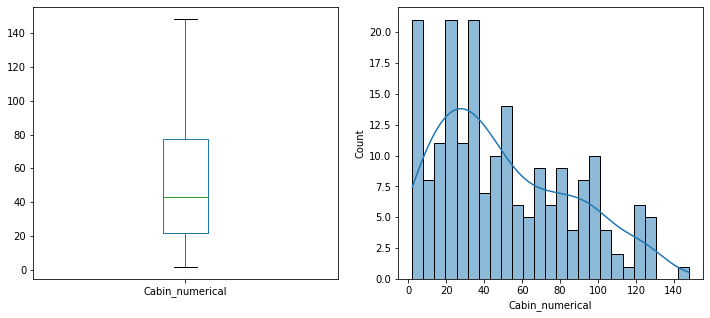

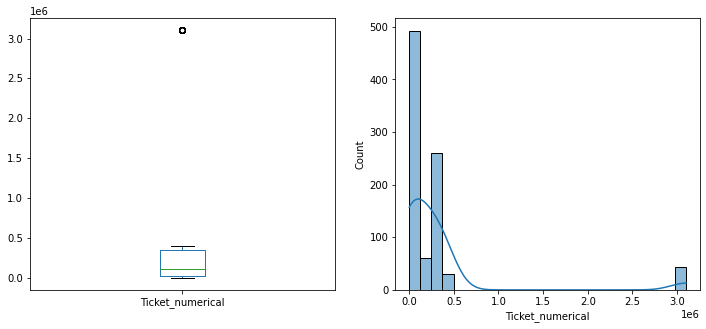

In [64]:
for var in ["Cabin_numerical","Ticket_numerical"]:
    plt.figure(figsize=(12,5))
    plt.subplot(1, 2, 1)
    data.boxplot(column=var,grid=False)
    
    plt.subplot(1, 2, 2)
    sns.histplot(data = data[var], kde = True,bins=25)

    plt.show()

- Cabin_numerical does not contain outliers


- Ticket_numerical seems to contain a few outliers.i will use discretisation for this variable

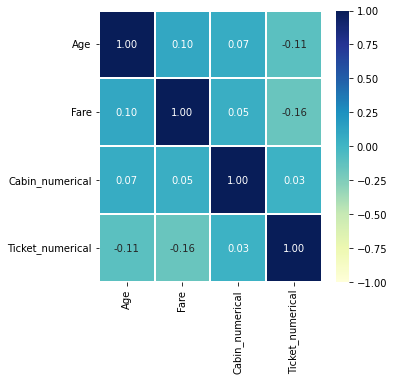

In [65]:
plt.figure(figsize=(5,5))
sns.heatmap(data[continuous].corr(),cmap="YlGnBu",annot=True,fmt=".2f",linewidths=1.5,vmin=-1,vmax=1)
plt.show()

#### New categorical variables: Missing values

In [66]:
data[["Cabin_categorical", "Ticket_categorical", "Title"]].isna().sum() / data.shape[0]

Cabin_categorical    0.771
Ticket_categorical   0.000
Title                0.000
dtype: float64

same amount of missing data in cabin_categorical than the original variable Cabin

#### New categorical variables: labels and rare values

In [67]:
for var in ["Cabin_categorical", "Ticket_categorical", "Title"]:
    print(data[var].value_counts() / (data.shape[0]))
    print()

C   0.066
B   0.053
D   0.037
E   0.036
A   0.017
F   0.015
G   0.004
T   0.001
Name: Cabin_categorical, dtype: float64

NAN       0.742
PC        0.067
CA        0.046
A         0.031
STONO     0.020
SOTONOQ   0.017
SCPARIS   0.012
WC        0.011
SOC       0.007
FCC       0.006
C         0.006
LINE      0.004
SOPP      0.003
PP        0.003
SCAH      0.003
WEP       0.003
SOTONO    0.002
PPP       0.002
SWPP      0.002
SCOW      0.001
SCA       0.001
SC        0.001
AS        0.001
SP        0.001
FC        0.001
FA        0.001
CASOTON   0.001
SOP       0.001
Name: Ticket_categorical, dtype: float64

Mr       0.581
Miss     0.202
Mrs      0.145
Master   0.045
Other    0.027
Name: Title, dtype: float64



Cabin_categorical contains 9 labels

Ticket_categorical contains 28 labels

Title contains 5 labels

- Cabin contains the rare labels G and T


- Ticket contains a lot of unfrequent labels


- Title does not contain rare labels

In [68]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_numerical,Cabin_categorical,Ticket_numerical,Ticket_categorical,Title,Family_size
0,1,0,3,male,22.000,1,0,7.250,S,NaN,NaN,21171.000,A,Mr,2
1,2,1,1,female,38.000,1,0,71.283,C,85.000,C,17599.000,PC,Mrs,2
2,3,1,3,female,26.000,0,0,7.925,S,NaN,NaN,3101282.000,STONO,Miss,1
3,4,1,1,female,35.000,1,0,53.100,S,123.000,C,113803.000,NAN,Mrs,2
4,5,0,3,male,35.000,0,0,8.050,S,NaN,NaN,373450.000,NAN,Mr,1


### Separate train and test set

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, data["Survived"], test_size=0.2,random_state=123)
                                                    
X_train.shape, X_test.shape

((712, 15), (179, 15))

### deal with missing values

In [70]:
#### missing values in continous + discrete

for col in continuous+discrete:
    if X_train[col].isna().mean()>0:
        print(col, round(X_train[col].isnull().mean(),3))

Age 0.208
Cabin_numerical 0.785
Ticket_numerical 0.006


Age and Cabin_numerical contains : we used median imputation + additional variable with NA(becasue it contains highly missingness)

Ticket_numerical contains: we used median imputation

In [71]:
# add variable indicating missingness + median imputation
for df in [X_train, X_test, submission]:
    for var in ["Age", "Cabin_numerical"]:
            df[var+"_NA"] = np.where(df[var].isnull(), 1, 0)
            df[var].fillna(X_train[var].median(), inplace=True)

for df in [X_train, X_test, submission]:
    df["Ticket_numerical"].fillna(X_train["Ticket_numerical"].median(), inplace=True)        

In [72]:
X_train[continuous+discrete].isna().sum().sum()

0

In [73]:
X_test[continuous+discrete].isna().sum().sum()

0

In [74]:
submission[continuous+discrete].isna().sum().sum()

1

In [75]:
# check missing values in submission dataset that did not show NA in training datset(except categorical)
submission_vars = []
for var in X_train[continuous+discrete]:
    if submission[var].isna().sum()>0:
        print(var, submission[var].isna().sum())
        submission_vars.append(var)

Fare 1


In [76]:
# Fill NA with median value for those variables that show NA only in the submission set
for var in submission_vars:
    submission[var].fillna(X_train[var].median(), inplace=True)

In [77]:
submission[continuous+discrete].isna().sum().sum()

0

In [78]:
# check categorical variables with missing data
for col in categorical:
    if X_train[col].isna().mean()>0:
        print(col, round(X_train[col].isna().mean(),3))

Embarked 0.003
Cabin_categorical 0.781


- Embarked imputed by most **frequent category**, because NA is low



- Cabin_categorical imputed by **'Missing'**, because NA is high

In [79]:
# add label indicating 'Missing' to Cabin categorical
# replace by most frequent label in Embarked

for df in [X_train, X_test, submission]:
    df["Embarked"].fillna(X_train["Embarked"].mode()[0], inplace=True)
    df["Cabin_categorical"].fillna("Missing", inplace=True)

In [80]:
X_train[categorical].isna().sum().sum()

0

In [81]:
X_test[categorical].isna().sum().sum()

0

In [82]:
submission[categorical].isna().sum().sum()

0

**No missing values found in any dataset**

### Deal with Outliers and distibutions in Numerical variables

#### Top coding(Capping) for Age

In [83]:
def top_code(df, variable, top):
    return np.where(df[variable] > top, top, df[variable])

for df in [X_train, X_test, submission]:
    df["Age"] = top_code(df, "Age", 73)

In [84]:
print(var, "max value is:", X_train["Age"].max())

Fare max value is: 73.0


#### discretisation for Ticket_numerical and Fare

In [85]:
# for tree Discretisation
from sklearn.tree import DecisionTreeClassifier
# for cross validation
from sklearn.model_selection import cross_val_score

score_mean_roc = [] # store the roc_auc
score_std_roc = [] # store the standard deviation of roc_auc
for tree_depth in [1,2,3]:
    tree_model = DecisionTreeClassifier(max_depth=tree_depth)

    # train the model using 10 fold cross validation
    scores = cross_val_score(tree_model, X_train[["Ticket_numerical","Fare"]], y_train, cv=10, scoring="roc_auc")
    score_mean_roc.append(np.mean(scores))
    score_std_roc.append(np.std(scores))
        
result_disc = pd.concat([pd.Series([1,2,3]), pd.Series(score_mean_roc), pd.Series(score_std_roc)], axis=1)
result_disc.columns = ["depth", "roc_mean", "roc_std"]
result_disc

,depth,roc_mean,roc_std
0,1,0.645,0.065
1,2,0.668,0.061
2,3,0.685,0.061


In [86]:
def tree_Discretisation(var):
    depth = 2
    tree_model = DecisionTreeClassifier(max_depth=depth)
    tree_model.fit(X_train[var].to_frame(),X_train["Survived"])
    X_train[var] = tree_model.predict_proba(X_train[var].to_frame())[:,1]
    X_test[var] = tree_model.predict_proba(X_test[var].to_frame())[:,1]
    submission[var] = tree_model.predict_proba(submission[var].to_frame())[:,1]

In [87]:
for var in ["Ticket_numerical","Fare"]:
    tree_Discretisation(var)

In [88]:
X_train[["Ticket_numerical","Fare"]].head()

,Ticket_numerical,Fare
329,0.535,0.459
749,0.196,0.243
203,0.293,0.243
421,0.535,0.243
97,0.535,0.459


In [89]:
# check how many different bins among our new continuous variables
for var in ["Ticket_numerical","Fare"]:
    print(var, len(X_train[var].unique()))

Ticket_numerical 4
Fare 4


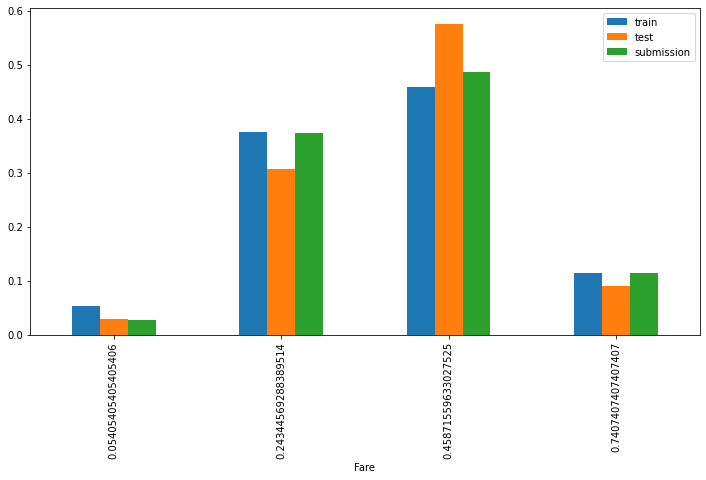

In [90]:
t1 = X_train.groupby(["Fare"])["Fare"].count() / len(X_train)
t2 = X_test.groupby(["Fare"])["Fare"].count() / len(X_test)
t3 = submission.groupby(["Fare"])["Fare"].count() / len(submission)

temp = pd.concat([t1,t2,t3], axis=1)
temp.columns = ["train", "test", "submission"]
temp.plot.bar(figsize=(12,6))
plt.show()

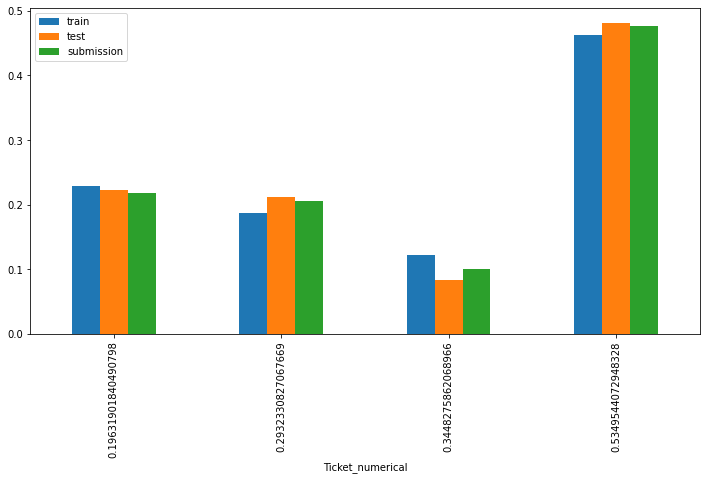

In [91]:
t1 = X_train.groupby(["Ticket_numerical"])["Ticket_numerical"].count() / len(X_train)
t2 = X_test.groupby(["Ticket_numerical"])["Ticket_numerical"].count() / len(X_test)
t3 = submission.groupby(["Ticket_numerical"])["Ticket_numerical"].count() / len(submission)

temp = pd.concat([t1,t2,t3], axis=1)
temp.columns = ["train", "test", "submission"]
temp.plot.bar(figsize=(12,6))
plt.show()

#### check missing values if  by random

In [92]:
X_train.isna().sum().sum()

0

In [93]:
X_test.isna().sum().sum()

0

In [94]:
submission.isna().sum().sum()

0

### deal with rare labels in categorical and discrete variables

In [95]:
def rare_imputation(variable, which="Rare"):    
    # find frequent labels
    temp = X_train.groupby([variable])[variable].count()/ len(X_train)
    frequent_cat = [x for x in temp.loc[temp > 0.01].index.values]
    
    # create new variables, with Rare labels imputed
    if which=="Frequent":
        # find the most frequent category
        mode_label = X_train.groupby(variable)[variable].count().sort_values().tail(1).index.values[0]
        X_train[variable] = np.where(X_train[variable].isin(frequent_cat), X_train[variable], mode_label)
        X_test[variable] = np.where(X_test[variable].isin(frequent_cat), X_test[variable], mode_label)
        submission[variable] = np.where(submission[variable].isin(frequent_cat), submission[variable], mode_label)
    
    else:
        X_train[variable] = np.where(X_train[variable].isin(frequent_cat), X_train[variable], "Rare")
        X_test[variable] = np.where(X_test[variable].isin(frequent_cat), X_test[variable], "Rare")
        submission[variable] = np.where(submission[variable].isin(frequent_cat), submission[variable], "Rare")

**summary about rare labels**

- Family_size: most frequency

    
- SibSp: most frequency

    
- Parch: most frequency

    
- Cabin_categorical: most frequency

    
- Ticket_categorical :Rare

In [96]:
rare_imputation("Family_size", "Frequent")
rare_imputation("SibSp", "Frequent")
rare_imputation("Parch", "Frequent")
rare_imputation("Cabin_categorical", "Frequent")

In [97]:
rare_imputation("Ticket_categorical", "Rare")

In [98]:
for cols in categorical + discrete:
    print(X_train.groupby(cols)[cols].count() / len(X_train))
    print()

Sex
female   0.353
male     0.647
Name: Sex, dtype: float64

Embarked
C   0.180
Q   0.094
S   0.726
Name: Embarked, dtype: float64

Cabin_categorical
A         0.017
B         0.046
C         0.063
D         0.037
E         0.037
F         0.013
Missing   0.788
Name: Cabin_categorical, dtype: float64

Ticket_categorical
A         0.034
CA        0.048
NAN       0.728
PC        0.066
Rare      0.063
SCPARIS   0.013
SOTONOQ   0.014
STONO     0.024
WC        0.011
Name: Ticket_categorical, dtype: float64

Title
Master   0.042
Miss     0.209
Mr       0.588
Mrs      0.139
Other    0.021
Name: Title, dtype: float64

Pclass
1   0.233
2   0.209
3   0.558
Name: Pclass, dtype: float64

SibSp
0   0.701
1   0.235
2   0.031
3   0.018
4   0.015
Name: SibSp, dtype: float64

Parch
0   0.781
1   0.131
2   0.088
Name: Parch, dtype: float64

Family_size
1   0.622
2   0.180
3   0.119
4   0.029
5   0.015
6   0.022
7   0.011
Name: Family_size, dtype: float64



In [99]:
for cols in categorical + discrete:
    print(submission.groupby(cols)[cols].count() / len(submission))
    print()

Sex
female   0.364
male     0.636
Name: Sex, dtype: float64

Embarked
C   0.244
Q   0.110
S   0.646
Name: Embarked, dtype: float64

Cabin_categorical
A         0.017
B         0.043
C         0.084
D         0.031
E         0.022
F         0.019
Missing   0.785
Name: Cabin_categorical, dtype: float64

Ticket_categorical
A         0.026
CA        0.065
NAN       0.708
PC        0.077
Rare      0.065
SCPARIS   0.019
SOTONOQ   0.022
STONO     0.007
WC        0.012
Name: Ticket_categorical, dtype: float64

Title
Master   0.050
Miss     0.187
Mr       0.574
Mrs      0.172
Other    0.017
Name: Title, dtype: float64

Pclass
1   0.256
2   0.222
3   0.522
Name: Pclass, dtype: float64

SibSp
0   0.684
1   0.263
2   0.033
3   0.010
4   0.010
Name: SibSp, dtype: float64

Parch
0   0.797
1   0.124
2   0.079
Name: Parch, dtype: float64

Family_size
1   0.620
2   0.177
3   0.136
4   0.033
5   0.017
6   0.007
7   0.010
Name: Family_size, dtype: float64



### Encode categorical variables

In [100]:
categorical

['Sex', 'Embarked', 'Cabin_categorical', 'Ticket_categorical', 'Title']

- Sex: one hot encoding(binary)

    
- Remaining variables: replace by risk probability(means replace the label by the mean of the target for that label)


- for more about risk probablity,https://medium.com/analytics-vidhya/target-encoding-vs-one-hot-encoding-with-simple-examples-276a7e7b3e64

In [101]:
for df in [X_train, X_test, submission]:
    df["Sex"]  = pd.get_dummies(df["Sex"], drop_first=True)

In [102]:
def encode_categorical_variables(var, target):
        # make label to risk dictionary
        ordered_labels = X_train.groupby([var])[target].mean().to_dict()
        
        # encode variables
        X_train[var] = X_train[var].map(ordered_labels)
        X_test[var] = X_test[var].map(ordered_labels)
        submission[var] = submission[var].map(ordered_labels)

In [103]:
# encode labels in categorical
for var in categorical:
    encode_categorical_variables(var, "Survived")

In [104]:
X_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_numerical,Cabin_categorical,Ticket_numerical,Ticket_categorical,Title,Family_size,Age_NA,Cabin_numerical_NA
329,330,1,1,0.745,16.000,0,1,0.459,0.547,18.000,0.758,0.535,0.394,0.705,2,0,0
749,750,0,3,0.195,31.000,0,0,0.243,0.403,40.000,0.312,0.196,0.394,0.165,1,0,1
203,204,0,3,0.195,45.500,0,0,0.243,0.547,40.000,0.312,0.293,0.394,0.165,1,0,1
421,422,0,3,0.195,21.000,0,0,0.243,0.403,40.000,0.312,0.535,0.083,0.165,1,0,1
97,98,1,1,0.195,23.000,0,1,0.459,0.547,10.000,0.769,0.535,0.596,0.165,2,0,0


In [105]:
X_train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_numerical,Cabin_categorical,Ticket_numerical,Ticket_categorical,Title,Family_size,Age_NA,Cabin_numerical_NA
count,712.000,712.000,712.000,712.000,712.000,712.000,712.000,712.000,712.000,712.000,712.000,712.000,712.000,712.000,712.000,712.000,712.000
mean,444.399,0.389,2.324,0.389,29.441,0.413,0.308,0.389,0.389,42.206,0.389,0.389,0.389,0.389,1.749,0.208,0.785
std,255.981,0.488,0.829,0.263,12.721,0.775,0.625,0.174,0.076,17.306,0.156,0.143,0.087,0.275,1.256,0.406,0.411
min,1.000,0.000,1.000,0.195,0.420,0.000,0.000,0.054,0.348,2.000,0.312,0.196,0.083,0.165,1.000,0.000,0.000
25%,223.750,0.000,2.000,0.195,22.000,0.000,0.000,0.243,0.348,40.000,0.312,0.293,0.394,0.165,1.000,0.000,1.000
50%,444.500,0.000,3.000,0.195,28.000,0.000,0.000,0.459,0.348,40.000,0.312,0.345,0.394,0.165,1.000,0.000,1.000
75%,658.250,1.000,3.000,0.745,35.000,1.000,0.000,0.459,0.403,40.000,0.312,0.535,0.394,0.705,2.000,0.000,1.000
max,891.000,1.000,3.000,0.745,73.000,4.000,2.000,0.741,0.547,148.000,0.778,0.535,0.596,0.798,7.000,1.000,1.000


In [106]:
training_vars = [var for var in X_train.columns if var not in ["PassengerId", "Survived"]]
training_vars

['Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked',
 'Cabin_numerical',
 'Cabin_categorical',
 'Ticket_numerical',
 'Ticket_categorical',
 'Title',
 'Family_size',
 'Age_NA',
 'Cabin_numerical_NA']

## Part3: Create Models and Evaluation

### Feature Scaling

In [107]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train[training_vars])

X_train[training_vars] = scaler.transform(X_train[training_vars])
X_test[training_vars] = scaler.transform(X_test[training_vars])
submission[training_vars] = scaler.transform(submission[training_vars])

In [108]:
X_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_numerical,Cabin_categorical,Ticket_numerical,Ticket_categorical,Title,Family_size,Age_NA,Cabin_numerical_NA
329,330,1,0.000,1.000,0.215,0.000,0.500,0.589,1.000,0.110,0.957,1.000,0.606,0.853,0.167,0.000,0.000
749,750,0,1.000,0.000,0.421,0.000,0.000,0.276,0.276,0.260,0.000,0.000,0.606,0.000,0.000,0.000,1.000
203,204,0,1.000,0.000,0.621,0.000,0.000,0.276,1.000,0.260,0.000,0.286,0.606,0.000,0.000,0.000,1.000
421,422,0,1.000,0.000,0.284,0.000,0.000,0.276,0.276,0.260,0.000,1.000,0.000,0.000,0.000,0.000,1.000
97,98,1,0.000,0.000,0.311,0.000,0.500,0.589,1.000,0.055,0.982,1.000,1.000,0.000,0.167,0.000,0.000


### Build Models

In [109]:
# to build the models
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

models = []
models.append(("LR", LogisticRegression()))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("SVC", SVC()))
models.append(("RF", RandomForestClassifier()))
models.append(("GB", GradientBoostingClassifier()))

### Model Evaluation

In [110]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

results = []
names = []
for name, model in models:
    kfold=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=123)
    cv_results= cross_val_score(model,X_train[training_vars], y_train,cv=kfold,scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    print("%s: %.3f (%.3f)" % (name,np.mean(cv_results),np.std(cv_results)))   

LR: 0.810 (0.035)
LDA: 0.807 (0.045)
SVC: 0.817 (0.035)
RF: 0.801 (0.046)
GB: 0.808 (0.057)


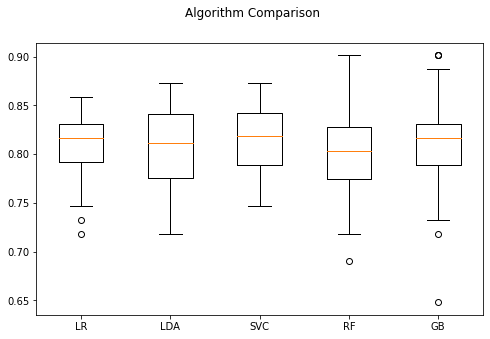

In [111]:
fig = plt.figure(figsize=(8,5))
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**Final model is Support Vector Classifier**

### Hyperparameter Tuning

In [112]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

c_values = [0.1,0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2, 3, 4, 5]
kernel_values = ["linear", "poly" ,"rbf", "sigmoid"]
param_grid = dict(C=c_values, kernel=kernel_values)

model = SVC()
kfold = StratifiedKFold(n_splits=10, random_state=123)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring="accuracy", cv=kfold)
grid_result = grid.fit(X_train[training_vars], y_train)
print("Best accuracy: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

print()
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best accuracy: 0.820246 using {'C': 0.9, 'kernel': 'rbf'}

0.783685 (0.034154) with: {'C': 0.1, 'kernel': 'linear'}
0.817410 (0.020811) with: {'C': 0.1, 'kernel': 'poly'}
0.794894 (0.032507) with: {'C': 0.1, 'kernel': 'rbf'}
0.783646 (0.031961) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.789300 (0.038431) with: {'C': 0.5, 'kernel': 'linear'}
0.811776 (0.033534) with: {'C': 0.5, 'kernel': 'poly'}
0.806201 (0.033024) with: {'C': 0.5, 'kernel': 'rbf'}
0.665649 (0.043158) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.793525 (0.039415) with: {'C': 0.7, 'kernel': 'linear'}
0.813165 (0.030434) with: {'C': 0.7, 'kernel': 'poly'}
0.817430 (0.037676) with: {'C': 0.7, 'kernel': 'rbf'}
0.661424 (0.041677) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.797731 (0.035830) with: {'C': 0.9, 'kernel': 'linear'}
0.813165 (0.030434) with: {'C': 0.9, 'kernel': 'poly'}
0.820246 (0.034213) with: {'C': 0.9, 'kernel': 'rbf'}
0.658607 (0.042019) with: {'C': 0.9, 'kernel': 'sigmoid'}
0.799120 (0.036898) with: {'C': 1.0, 'kernel'

In [113]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

svc_model = SVC(random_state=123,kernel="rbf",C=0.9)
svc_model.fit(X_train[training_vars], y_train)

pred = svc_model.predict(X_test[training_vars])
print(accuracy_score(y_test, pred))
print()
print(classification_report(y_test, pred))

0.8770949720670391

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       114
           1       0.89      0.75      0.82        65

    accuracy                           0.88       179
   macro avg       0.88      0.85      0.86       179
weighted avg       0.88      0.88      0.87       179



In [114]:
final_pred = svc_model.predict(submission[training_vars])

In [115]:
sub = pd.concat([submission["PassengerId"], pd.Series(final_pred)], axis=1)
sub.columns = ["PassengerId", "Survived"]
sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


# End of Code